In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

set_config(print_changed_only=False)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

<h1 style='color:blue' align='center'>K-Nearest Neighbor Classifier </h1>

<img src='./data/KNN.jpg' width=800 height=600>
<a href='https://blakelobato1.medium.com/k-nearest-neighbor-classifier-implement-homemade-class-compare-with-sklearn-import-6896f49b89e'> Reference </a>

<img src='./data/KNN_1.jpg' width=1000 height=600>

<h1 style='color:blue' align='center'> KNN (K Nearest Neighbors) Classification with iris data </h1>

<img src="./data/iris_petal_sepal.png" height=300 width=300>

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.10,3.50,1.40,0.20,0
1,4.90,3.00,1.40,0.20,0
2,4.70,3.20,1.30,0.20,0
3,4.60,3.10,1.50,0.20,0
4,5.00,3.60,1.40,0.20,0


In [7]:
df['flower_name'] =df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.10,3.50,1.40,0.20,0,setosa
1,4.90,3.00,1.40,0.20,0,setosa
2,4.70,3.20,1.30,0.20,0,setosa
3,4.60,3.10,1.50,0.20,0,setosa
4,5.00,3.60,1.40,0.20,0,setosa


In [8]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.80,3.00,1.40,0.30,0,setosa
46,5.10,3.80,1.60,0.20,0,setosa
47,4.60,3.20,1.40,0.20,0,setosa
48,5.30,3.70,1.50,0.20,0,setosa
49,5.00,3.30,1.40,0.20,0,setosa
50,7.00,3.20,4.70,1.40,1,versicolor
51,6.40,3.20,4.50,1.50,1,versicolor
52,6.90,3.10,4.90,1.50,1,versicolor
53,5.50,2.30,4.00,1.30,1,versicolor
54,6.50,2.80,4.60,1.50,1,versicolor


In [9]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

Text(0.5, 0, 'Sepal Length')

Text(0, 0.5, 'Sepal Width')

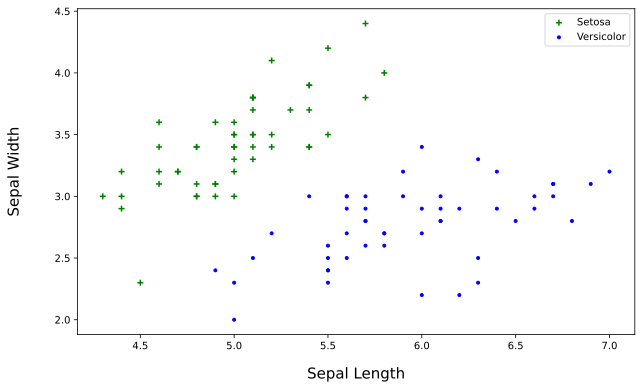

In [10]:
plt.rcParams['figure.figsize']=(10,6)
ax=plt.subplot()

ax.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+', label='Setosa')
ax.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.', label='Versicolor')

ax.set_xlabel('Sepal Length', fontsize=15)
ax.set_ylabel('Sepal Width', fontsize=15)
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

ax.legend()

**Petal length vs Pepal Width (Setosa vs Versicolor)**

Text(0.5, 0, 'Petal Length')

Text(0, 0.5, 'Petal Width')

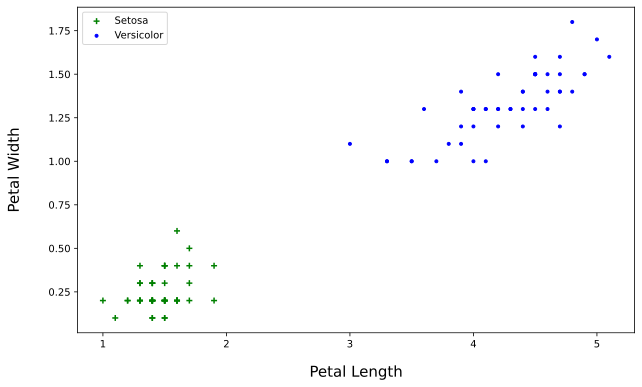

In [11]:
ax=plt.subplot()

ax.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker='+', label='Setosa')
ax.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='.', label='Versicolor')

ax.set_xlabel('Petal Length', fontsize=15)
ax.set_ylabel('Petal Width', fontsize=15)
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

ax.legend()

In [12]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
len(X_train)

120

In [15]:
len(X_test)

30

### Create KNN (K Nearest Neighbour Classifier)

In [16]:
knn = KNeighborsClassifier(n_neighbors=10)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [18]:
knn.score(X_test, y_test)

0.9666666666666667

In [19]:
knn.predict([[4.8,3.0,1.5,0.3]])

array([0])

### Plot Confusion Matrix

In [20]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

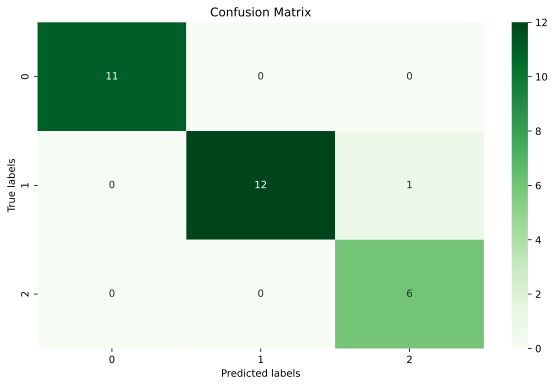

In [21]:
ax= plt.subplot()
sns.heatmap(cm, 
            annot=True, 
            fmt='g',
            cmap='Greens', 
            ax=ax)

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.set_xticklabels(['0', '1', '2']); 
# ax.set_yticklabels(['2', '1', '0']);

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



<img src='./data/KNN_2.jpg' width=1000 height=600>

<img src='./data/KNN_3.jpg' width=700 height=500>

<img src='./data/KNN_4.jpg' width=1000 height=400>

### Exercise

In [23]:
digits = load_digits()

In [24]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [25]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [26]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
df = pd.DataFrame(digits.data, digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.00,0.00,5.00,13.00,9.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,6.00,13.00,10.00,0.00,0.00,0.00
1,0.00,0.00,0.00,12.00,13.00,5.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,11.00,16.00,10.00,0.00,0.00
2,0.00,0.00,0.00,4.00,15.00,12.00,0.00,0.00,0.00,0.00,...,5.00,0.00,0.00,0.00,0.00,3.00,11.00,16.00,9.00,0.00
3,0.00,0.00,7.00,15.00,13.00,1.00,0.00,0.00,0.00,8.00,...,9.00,0.00,0.00,0.00,7.00,13.00,13.00,9.00,0.00,0.00
4,0.00,0.00,0.00,1.00,11.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.00,16.00,4.00,0.00,0.00


In [28]:
df['target'] = digits.target
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.00,0.00,5.00,13.00,9.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,6.00,13.00,10.00,0.00,0.00,0.00,0
1,0.00,0.00,0.00,12.00,13.00,5.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,11.00,16.00,10.00,0.00,0.00,1
2,0.00,0.00,0.00,4.00,15.00,12.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,3.00,11.00,16.00,9.00,0.00,2
3,0.00,0.00,7.00,15.00,13.00,1.00,0.00,0.00,0.00,8.00,...,0.00,0.00,0.00,7.00,13.00,13.00,9.00,0.00,0.00,3
4,0.00,0.00,0.00,1.00,11.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,2.00,16.00,4.00,0.00,0.00,4
5,0.00,0.00,12.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,9.00,16.00,16.00,10.00,0.00,0.00,5
6,0.00,0.00,0.00,12.00,13.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,9.00,15.00,11.00,3.00,0.00,6
7,0.00,0.00,7.00,8.00,13.00,16.00,15.00,1.00,0.00,0.00,...,0.00,0.00,0.00,13.00,5.00,0.00,0.00,0.00,0.00,7
8,0.00,0.00,9.00,14.00,8.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,11.00,16.00,15.00,11.00,1.00,0.00,8
9,0.00,0.00,11.00,12.00,0.00,0.00,0.00,0.00,0.00,2.00,...,0.00,0.00,0.00,9.00,12.00,13.00,3.00,0.00,0.00,9


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3, random_state=10)

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)

In [31]:
len(X_train)

1257

In [32]:
len(X_test)

540

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
knn.score(X_test,y_test)

0.987037037037037

In [35]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 52]], dtype=int64)

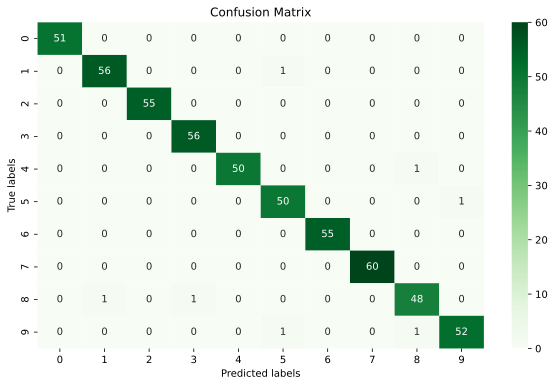

In [36]:
ax= plt.subplot()
sns.heatmap(cm, 
            annot=True, 
            fmt='g',
            cmap='Greens', 
            ax=ax)

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      0.98      0.98        57
           2       1.00      1.00      1.00        55
           3       0.98      1.00      0.99        56
           4       1.00      0.98      0.99        51
           5       0.96      0.98      0.97        51
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00        60
           8       0.96      0.96      0.96        50
           9       0.98      0.96      0.97        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

